# Maximizing Concentration of an Intermediate in a Batch Reactor using solve_ivp

https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/06.02-Maximizing-Concentration-of-an-Intermediate-in-a-Batch-Reactor.html

***optimization***

variables: time

objective: max C$_B$(t)

functional constraint: none

bounds: 0 $\leq$ t $\leq$ 50

In [1]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize_scalar
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Concentration CB has maximum 1.3373856928891767 moles/liter at time 4.0258634492883365 minutes.


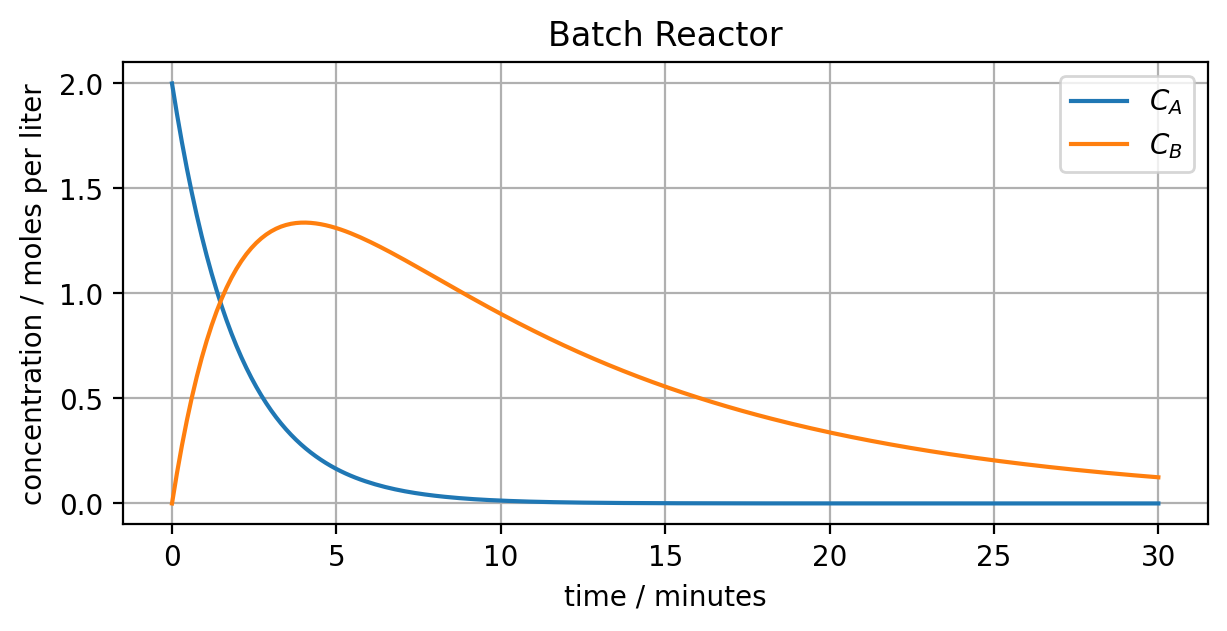

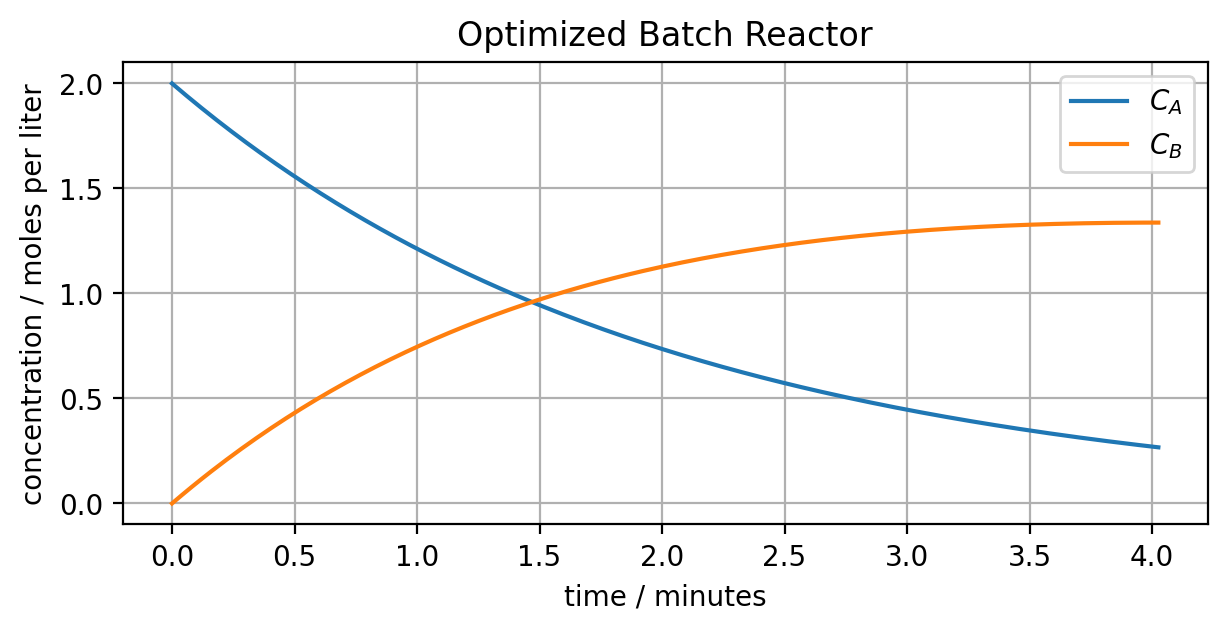

In [2]:
V = 40     # liters
kA = 0.5   # 1/min
kB = 0.1   # l/min
CAf = 2.0  # moles/liter

def batch(t, y):
    
    CA, CB = y
    dCA_dt = -kA*CA
    dCB_dt = kA*CA - kB*CB
    
    return np.array([dCA_dt, dCB_dt])

t = np.linspace(0, 30, 200)

soln = solve_ivp(batch, (0, t[-1]), [CAf, 0], t_eval = t)

fig, ax = plt.subplots(figsize = (7, 3), dpi=200)
ax.plot(t, soln.y[0])
ax.plot(t, soln.y[1])
ax.set_xlabel('time / minutes')
ax.set_ylabel('concentration / moles per liter')
ax.set_title('Batch Reactor')
ax.legend(['$C_A$','$C_B$'])
ax.grid(True)

def obj_conv(x):
    
    # to find the maximum value, we first write a function to compute CB for any value of time.
    t = x[0]
    
    soln = solve_ivp(batch, (0, t), [CAf, 0])
    
    y = soln.y[:, -1]
    
    CA = y[0]
    CB = y[1]
    
    return -CB # we need to minimize the negative value of CB

sol_bounded = minimize(obj_conv, np.array([10]), method="SLSQP", bounds= [(0, 50)])
print('Concentration CB has maximum', -obj_conv(sol_bounded.x), 'moles/liter at time', sol_bounded.x[0], 'minutes.')

def batch_opt(x, t_eval = None):
    
    t = x[0]
    
    soln = solve_ivp(batch, (0, t), [CAf, 0], t_eval = t_eval)
    
    return soln

sol_batch_opt = batch_opt(sol_bounded.x, t_eval = np.linspace(0, sol_bounded.x[0], 200))

fig, ax = plt.subplots(figsize = (7, 3), dpi=200)

ax.plot(sol_batch_opt.t, sol_batch_opt.y[0])
ax.plot(sol_batch_opt.t, sol_batch_opt.y[1])
ax.set_xlabel('time / minutes')
ax.set_ylabel('concentration / moles per liter')
ax.set_title('Optimized Batch Reactor')
ax.legend(['$C_A$', '$C_B$'])
ax.grid(True)